In [11]:
import pandas as pd
# create a Series with an arbitrary list
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
s
# specify an index to use when creating the Series
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'],
              index=['A', 'Z', 'C', 'Y', 'E'])
# s
# s[0] # Access using index location
# s['Z'] # Access using label

d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities

Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64

In [12]:
cities > 500

Austin           False
Boston           False
Chicago           True
New York          True
Portland          True
San Francisco     True
dtype: bool

In [15]:
cities.isnull()

Austin           False
Boston            True
Chicago          False
New York         False
Portland         False
San Francisco    False
dtype: bool

In [16]:
print(cities.isnull)

<bound method Series.isnull of Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64>


Access by index ver 1 0     5
1     8
2     6
3     1
4     5
5    10
6     6
7    12
Name: losses, dtype: int64
Access by index ver 2 0     5
1     8
2     6
3     1
4     5
5    10
6     6
7    12
Name: losses, dtype: int64


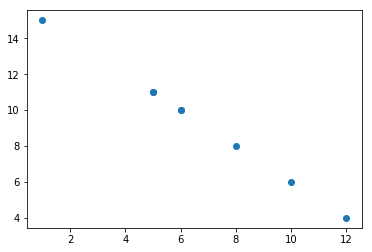

In [12]:
import matplotlib.pyplot as plt

data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
print ("Access by index ver 1", football['losses'])
print ("Access by index ver 2", football.losses)
#Now plot with pandas
plt.scatter(football.losses, football.wins)

In [13]:
football[football.year > 2011] # gets you only the information 2012 and onwards
# can build even more complex queries by combining using logical operators, | (OR), & (AND)
football[(football.wins > 5) & (football.losses < 5)] # gets you those teams with less than 5 losses and more than 5 wins

,year,team,wins,losses
3,2011,Packers,15,1


In [14]:
# now create two data frames

left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
#check what is inside
print (left_frame)
print (right_frame)

# now merge these data frames based on the 'key' field -- a common task when merging data sources
print ("--- An inner join:")
print (pd.merge(left_frame, right_frame, on='key'))
# Now add a new element to the left_frame with a key value 2 and assign it to a new variable
left_frame_new = left_frame.append([dict(key=2, left_value='dd')])
# and now try merging the new array
print (pd.merge(left_frame_new, right_frame, on='key'))
# different types of merging are possible
print ("--- Now a left outer join:")
print (pd.merge(left_frame, right_frame, on='key', how='left')) # notice the NAN values - reflect on why they exist

   key left_value
0    0          a
1    1          b
2    2          c
3    3          d
4    4          e
   key right_value
0    2           f
1    3           g
2    4           h
3    5           i
4    6           j
--- An inner join:
   key left_value right_value
0    2          c           f
1    3          d           g
2    4          e           h
   key left_value right_value
0    2          c           f
1    2         dd           f
2    3          d           g
3    4          e           h
--- Now a left outer join:
   key left_value right_value
0    0          a         NaN
1    1          b         NaN
2    2          c           f
3    3          d           g
4    4          e           h
